# Phan tich du lieu #

### Tran Dinh Hieu - 20IT212
### Tran Thi Bao Nhung - 20IT566


# **Pre-processing**

In [8]:
import numpy as np
import pandas as pd
import json
import datetime

import re
import nltk
from nltk.corpus import stopwords

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [9]:
#Reading the data from csv file and storing it in a variable named df means data-frame
df = pd.read_csv("US_youtube_trending_data.csv")

#Lets Check First 5 data in the table to analyse the variables
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


# **Variables Analysis**
There are 16 colums in the US dataset:

"video_id,title, title,publishedAt, channelId, channelTitle, categoryId, trending_date, tags,view_count, likes,dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, description"

Lets observe the variables that we might need

* **video_id**: Have alphabets and numbers. But we wont be neading it for analysis but it can be used as a prove that the video really exists and we didn't just randomly add any data.
* **trending_date**: Have the date when the video started trending.
* **title**: Title represents the whole video or we can say what the video is about but sometimes youtubers tend to add catchy or falsy words so that viewers click on the video in the motive of geting views.
* **channel_title**: Chanel name nothing much can be used to differentiate content creators.
* **category_id**: YouTube gives every video a catagory id based on the video or the chanel owner can set a catagory so that viewers can find the video faster using the filter options.
* **publishedAt**: When the video was actually published can be helpfull to know when the event started happning.
* **tags**: Tags are famous ways to connect videos in worldwide known words we can also say that these are unoffical catagorys commonly known by people/viewers.
* **views,likes,dislikes,comment_count**: Has numerical values it represents the ingagements of the video.
* **thumbnail_link**: have the url for the picture of the thumbnail. Oddly now adding exotic pics to thumbnails can bring more views. We can analys the pics but that topic is more advanced so we will not be doing that.
* **comments_disabled,ratings_disabled,video_error_or_removed**: Have bool values we think about it later if needed.
* **description**: Have description as string. Might contain emoji ar ascii values, we have to remove them if we use them for anylysis.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220588 entries, 0 to 220587
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           220588 non-null  object
 1   title              220588 non-null  object
 2   publishedAt        220588 non-null  object
 3   channelId          220588 non-null  object
 4   channelTitle       220588 non-null  object
 5   categoryId         220588 non-null  int64 
 6   trending_date      220588 non-null  object
 7   tags               220588 non-null  object
 8   view_count         220588 non-null  int64 
 9   likes              220588 non-null  int64 
 10  dislikes           220588 non-null  int64 
 11  comment_count      220588 non-null  int64 
 12  thumbnail_link     220588 non-null  object
 13  comments_disabled  220588 non-null  bool  
 14  ratings_disabled   220588 non-null  bool  
 15  description        216261 non-null  object
dtypes: bool(2), int64(5)

In [11]:
#Lets remove "video_id" and "thumbnail_link" we wont be needing those

df.drop(columns=['video_id','thumbnail_link'],inplace=True, errors='ignore')
#Lets check that if we had successfully removed the columns.
df.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


**Catagory ID Mapping**

Currently, the category_id column contains the category id of each video, which is in the form of a number. We will replace the **category id** with the corresponding category title, as provided to us from in a json file from the original Kaggle dataset. To do this, we will create the dictionary **categoryID**, which will contain each category's information (i.e. kind, etag, id, title, etc.) We are only interested in the id and title, so we will create a separate dictionary called **ID_to_Category** which will just contain the id's as keys and the corresponding titles.

In [12]:
#We need to import json so that we can use its contents.

with open("US_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [13]:
ID_to_Category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [14]:
ID_to_Category.keys()

dict_keys([1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [15]:
#Lets store the dictionary as another Json for further use in analysis
#with open('Datasets/id_to_categori.json', 'w') as outfile:
    #json.dump(ID_to_Category, outfile)

Now lets replace the category_id with there respected name in the column.

In [16]:
df.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


In [17]:
df['categoryId'] = df['categoryId'].apply(lambda x: ID_to_Category[x])
#Lets see the result
df.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


**Data Instancing**

Both the **trending_date** and **publishedAt** columns have dates, but in different format. Publish_time includes the time of publication and date, while trending_date only have the date. Since we don't have the time the video started trending, we cannot compare it to the publish time. In the end, we will clean the data such that both columns include datatime.date objects.

In [18]:
#2020-08-11T19:20:14Z
def clean_trending_date(date):
    y,m,d = date.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [19]:
df['trending_date'] = df['trending_date'].apply(clean_trending_date)
df['publishedAt'] = df['publishedAt'].apply(clean_publish_time)

#Lets check the result
df.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


**Tag Splitting**

Now lets clean up the **tags** column by separating tags into a list instead of one long string.

In [20]:
def clean_tags(tag):
    if tag == '[none]': return []
    return tag.lower().replace('"','').split('|')

In [21]:
df['tags'] = df['tags'].apply(clean_tags)
df.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


**Natural Language processing for Title**

This time we will clean the **video title** and keep only the nececary words. So that, we can better analys certain keywords being used in the titles.

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hieudinhos/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
def clean_titles(title):
    tokens = title.lower().split()
    cleaned = []
    sw = set(stopwords.words('english'))
    for token in tokens:
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  # Remove money amount, non-alphanumeric tokens, or stopwords
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

df['title_cl'] = df['title'].apply(clean_titles)

#Lets check for result
df.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,title_cl
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,asked
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",apex legends stories outlands


# **Data Visualization**

**Title Word Choice** 

Now that we have nicely cleaned our data, we will start analysing our data. We will start from what words are mostly used in video titles by counting how many the same words has been used and folow on after that first lets find them.

In [25]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in df['title_cl']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

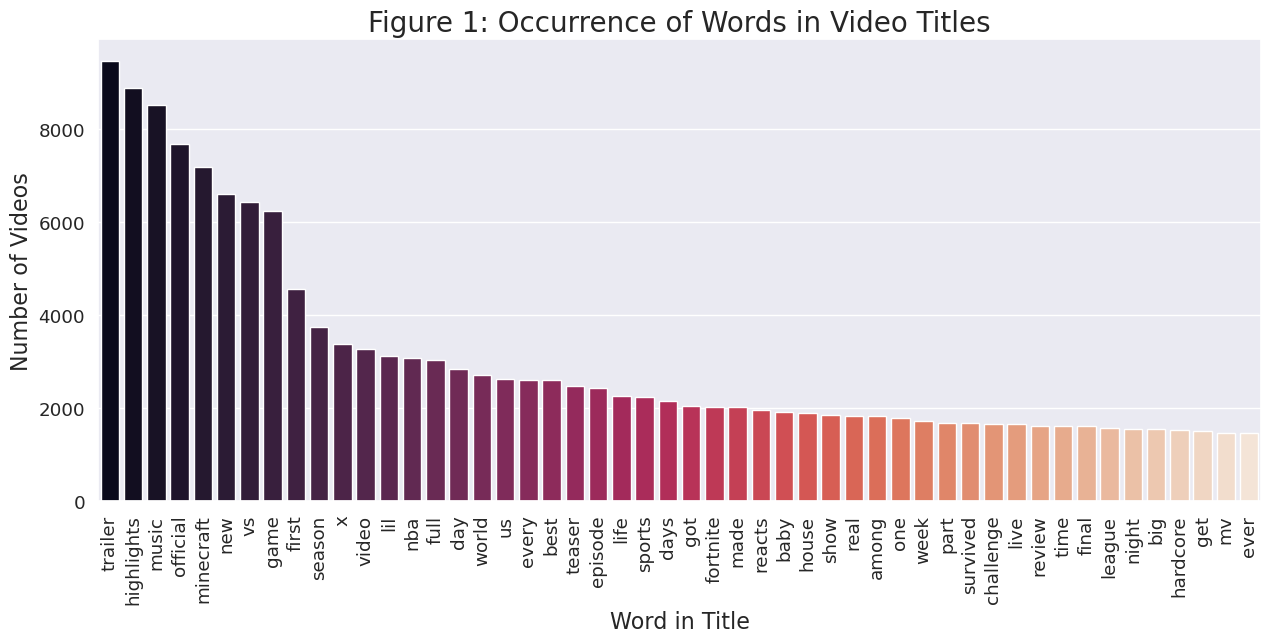

In [26]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=20)
plt.show()

From Figure 1, We can see that the top ten words are **trailer, highlights, music, official, minecraft, new, vs, game, first, season** it seems that some words quict nicely go together like "official trailer", "new music", "official music", "new game", "new season", "new minecraft season", etc...

**Video Catagories**

Now we will find what catagory of trending videos are most and least common by looking at the frequencies of video categories.

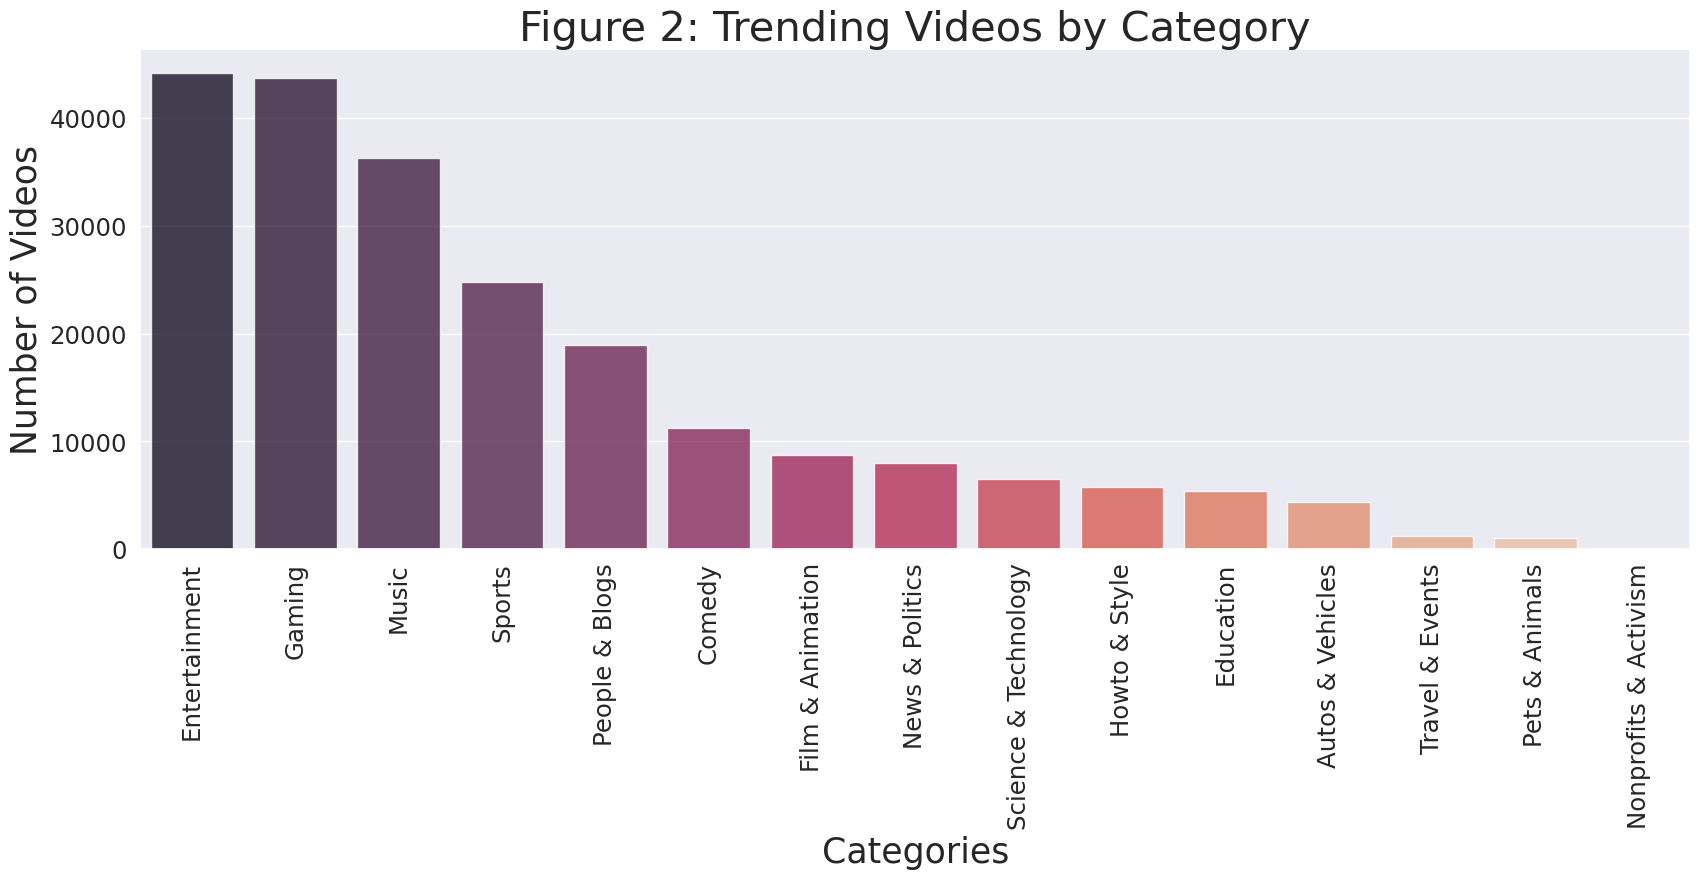

In [27]:
# Bar graph for number of videos per category
sns.set_style("darkgrid")
sns.set(font_scale=1.6)

categories = df['categoryId'].value_counts()

plt.figure(figsize=(20,6.5))
sns.barplot(x=categories.index, y=categories.values, alpha=0.8, palette="rocket")

sns.set(font_scale=1.6)
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 2: Trending Videos by Category', fontsize=30)
plt.show()

From Figure 2, we can see that the Entertainment category has the most number of trending videos with about 45,000 approximate which accounts for about a one fifth of the videos in this dataset. Similarly we can also see that the Gaming category has almost same but less amount of videos about 42,000 approximate which accounts for another one fifth of the vidoes in the dataset. The Music catagory has vidoe count bellow 40,000 but no other catagory has even reached 30,000 other then music but lets not negate the fact that the sport catagory has over 25,000 video count other then these four major catagory rest of them dosent even have 20,000 video count.

To see the percentage of these four categories more acurately lets run the following code additionally lets see for the least 3 categories also.

In [28]:
# Caculating the percentages for top 4 categories
entertainment = df[df['categoryId'] == 'Entertainment']['categoryId'].count() / df['categoryId'].count() * 100
gaming = df[df['categoryId'] == 'Gaming']['categoryId'].count() / df['categoryId'].count() * 100
music = df[df['categoryId'] == 'Music']['categoryId'].count() / df['categoryId'].count() * 100
sports = df[df['categoryId'] == 'Sports']['categoryId'].count() / df['categoryId'].count() * 100

# Calculating the percentages for bottom 3 categories
travelandevents = df[df['categoryId'] == 'Travel & Events']['categoryId'].count() / df['categoryId'].count() * 100
petsandanimals = df[df['categoryId'] == 'Pets & Animals']['categoryId'].count() / df['categoryId'].count() * 100
nonprofits = df[df['categoryId'] == 'Nonprofits & Activism']['categoryId'].count() / df['categoryId'].count() * 100

In [29]:
#Lets print the percentages
print("Top 5:")
print("Entertainment:",entertainment)
print("Gaming:",gaming)
print("Music:",music)
print("Sports:",sports)
print("\n")
print("Least 3:")
print("Travel & Events:",travelandevents)
print("Pets & Animals",petsandanimals)
print("Nonprofits & Activism",nonprofits)

Top 5:
Entertainment: 20.05050138720148
Gaming: 19.833807822728346
Music: 16.47777757629608
Sports: 11.257185340997697


Least 3:
Travel & Events: 0.5684806063793134
Pets & Animals 0.4556004859738517
Nonprofits & Activism 0.05168005512539213


After doing the calculation for the percentages of categories, it is noteworthiy that **Entertainment**(20.05%), **Gaming**(19.79%), **Music**(16.49%), **Sports**(11.24%) make up 67.67% of the trending videos. The common thing is that these type of videos are mostly leisure type except for sports.

**Channel Frequencies**

Now lets see which chanels have a large number of trending videos. Based on our previous catagory analysis, we can assume that the channels with the most number of trending videos will be Entertainment, Gaming, Music and Sports chanel.
We can start by calculating the trending video frequency for each channel.

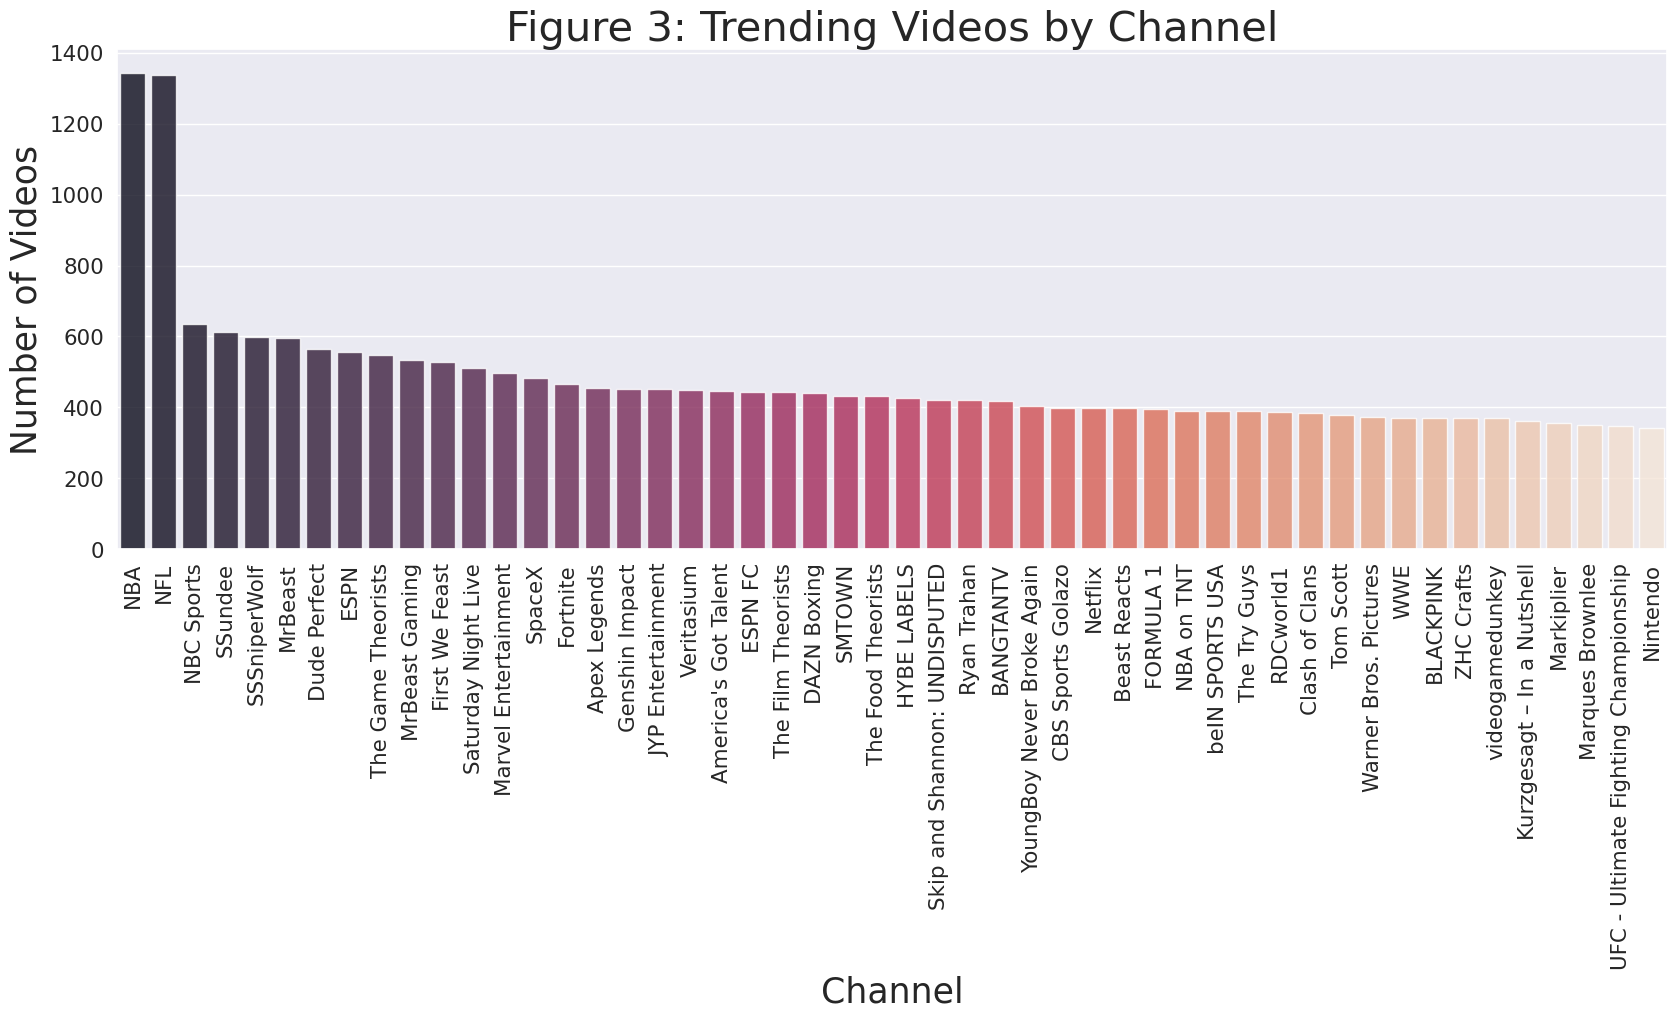

In [30]:
sns.set_style("darkgrid")
sns.set(font_scale=1.4)

channel_freq = df['channelTitle'].value_counts()
channel_freq = channel_freq[0:50]

# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 3: Trending Videos by Channel', fontsize=30)
plt.show()

From, the graph, we can see that **NBA**(near 1300+ videos), neek to neek **NFL**(near 1300 videos), after these two others are starting from **NBC Sports**(600+ videos) and rest of them are near 600 or less then 600 to 400. Here is the top 10 chanels with trending videos and their respective Catagory.

* NBA: Sports
* NFL: Sports
* NBC Sports: Sports
* SSundee: Gaming
* SSSniperWlof: Reaction, Vlogs, Gaming
* MrBeast: Entertainment, Vlogs, Gaming
* Dude Perfect: Sports & Vlogs
* ESPN: Sports
* The Game Theorists: Education & Gaming
* MrBeast Gaming: Gaming

In [ ]:
channel_freq[0:10]

So we can easyly say that NBA & NFL are untuchable in number of trending videos.

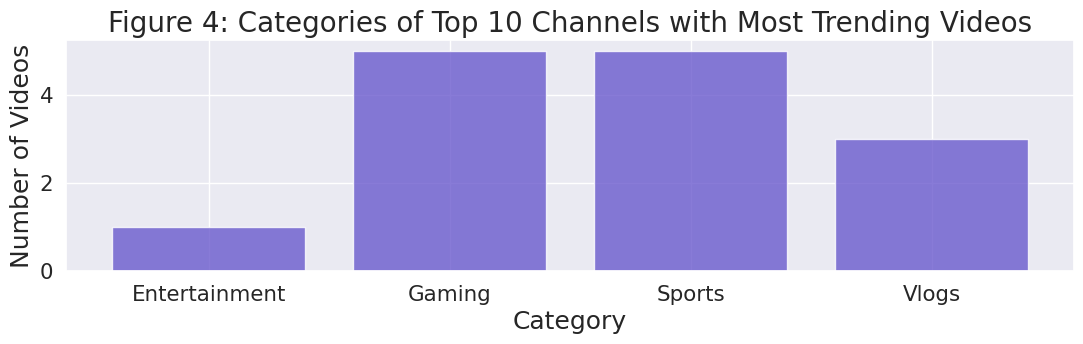

In [31]:
d = {'Entertainment': 1, 'Gaming': 5, 'Sports': 5, 'Vlogs': 3}

# Bar graph for the number of videos per category for the top 10 channels with trending videos
plt.figure(figsize=(13,3))
plt.bar(range(len(d)), list(d.values()), align='center', alpha=0.8, 
        color="slateblue")
plt.xticks(range(len(d)), list(d.keys()))
plt.xlabel("Category", fontsize=18)
plt.ylabel("Number of Videos",fontsize=18)
plt.title('Figure 4: Categories of Top 10 Channels with Most Trending Videos', 
          fontsize=20)
plt.show()

Our earlier Exploration of the catagories suports the fact that almost 20% of the videos are Gaming but it seems that many chanels that produce entertainment contents but the cahnel itself dosent identify or belong into an Entertainment catagory another case could be that entertainment contents are not made by top 10 chanels and for the case of Music it seems like most of the channels are personal chanel so the content creators mostly vlog and in the other videos they produce music and when they make music they gets viral nad gets into trending page and the videos itself gets into Music catagory. So we will do another histogram for chanel frequencies.

Text(0.5, 1.0, 'Figure 5: Frequency of Channels with Trending Videos')

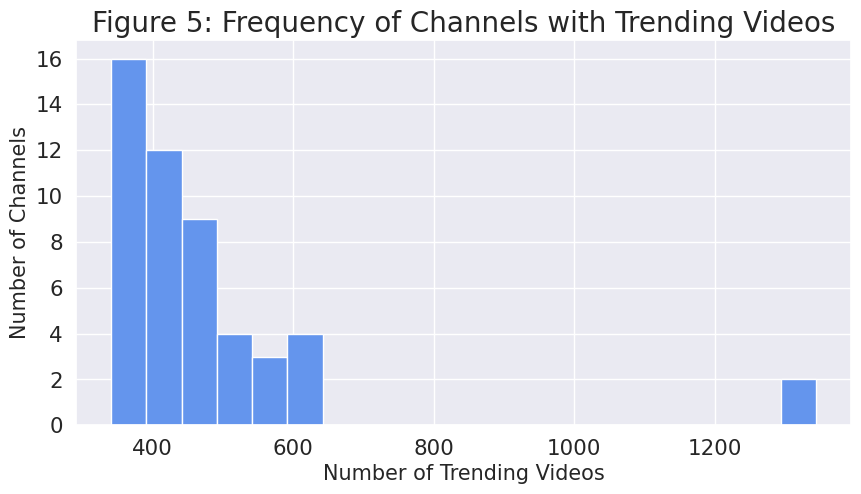

In [32]:
# Histogram for channel frequencies
plt.figure(figsize=(10,5))
channel_freq.hist(bins=20, color="cornflowerblue")
plt.xlabel("Number of Trending Videos", fontsize=15)
plt.ylabel("Number of Channels", fontsize=15)
plt.title('Figure 5: Frequency of Channels with Trending Videos', fontsize=20)

This hsitogram, Figure 5, helps us understand why the top 10 channels with trending videos may not match with the exploration of categories we did earlier as the distribution is extremely right skewed. Only 2 chanels have 1350 trending videos, while we have a few channels with over 600 videos. We will calculate the percentages fo the number of trending videos that channels have to look at the distribution more closely.

In [33]:
# Percentage of number of trending videos a channel has
above_20 = len([i for i in channel_freq if i > 1000]) / len(channel_freq) * 100
percent_16_20 = len([i for i in channel_freq if (i <= 1000) & (i > 800)]) / len(channel_freq) * 100
percent_11_15 = len([i for i in channel_freq if (i <= 800) & (i > 700)]) / len(channel_freq) * 100
percent_6_10 = len([i for i in channel_freq if (i <= 700) & (i > 600)]) / len(channel_freq) * 100
percent_1_5 = len([i for i in channel_freq if (i <= 600)]) / len(channel_freq) * 100

In [34]:
#Lets print the percentages
print("Above 1000:",above_20)
print("Between 1000 to 800:",percent_16_20)
print("Between 800 to 700:",percent_11_15)
print("Between 700 to 600:",percent_6_10)
print("Between 600 to 500:",percent_1_5)

Above 1000: 4.0
Between 1000 to 800: 0.0
Between 800 to 700: 0.0
Between 700 to 600: 4.0
Between 600 to 500: 92.0
